# Logistic regression example

Borrowed heavily from: http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/12_logistic_regression.ipynb

## Glass identification dataset

This dataset (from UCI) contains multiple chemical compositions which make up various types of glass (labelled types 1-7). It also contains the refractive index `ri`.    

    Attribute Information:

    1. Id number: 1 to 214
    2. RI: refractive index
    3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    4. Mg: Magnesium
    5. Al: Aluminum
    6. Si: Silicon
    7. K: Potassium
    8. Ca: Calcium
    9. Ba: Barium
    10. Fe: Iron
    11. Type of glass: (class attribute)
    -- 1 building_windows_float_processed
    -- 2 building_windows_non_float_processed
    -- 3 vehicle_windows_float_processed
    -- 4 vehicle_windows_non_float_processed (none in this database)
    -- 5 containers
    -- 6 tableware
    -- 7 headlamps
    
Lets load the dataset into pandas. 

In [4]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')

In [5]:
glass

ri     na    mg    al     si     k    ca    ba    fe  glass_type
id                                                                        
1    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00           1
2    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00           1
3    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00           1
4    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00           1
5    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00           1
6    1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26           1
7    1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.00  0.00           1
8    1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.00  0.00           1
9    1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.00  0.00           1
10   1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.00  0.11           1
11   1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.00  0.24           1
12   1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.00  0.00           1
13   1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.00  0.24           1
14   1.51748  12.86  3.56  1.27  73.21  0.54  8.38  0.00  0.17           1
15   1.51763  12.61  3.59  1.31  73.29  0.58  8.50  0.00  0.00           1
16   1.51761  12.81  3.54  1.23  73.24  0.58  8.39  0.00  0.00           1
17   1.51784  12.68  3.67  1.16  73.11  0.61  8.70  0.00  0.00           1
18   1.52196  14.36  3.85  0.89  71.36  0.15  9.15  0.00  0.00           1
19   1.51911  13.90  3.73  1.18  72.12  0.06  8.89  0.00  0.00           1
20   1.51735  13.02  3.54  1.69  72.73  0.54  8.44  0.00  0.07           1
21   1.51750  12.82  3.55  1.49  72.75  0.54  8.52  0.00  0.19           1
22   1.51966  14.77  3.75  0.29  72.02  0.03  9.00  0.00  0.00           1
23   1.51736  12.78  3.62  1.29  72.79  0.59  8.70  0.00  0.00           1
24   1.51751  12.81  3.57  1.35  73.02  0.62  8.59  0.00  0.00           1
25   1.51720  13.38  3.50  1.15  72.85  0.50  8.43  0.00  0.00           1
26   1.51764  12.98  3.54  1.21  73.00  0.65  8.53  0.00  0.00           1
27   1.51793  13.21  3.48  1.41  72.64  0.59  8.43  0.00  0.00           1
28   1.51721  12.87  3.48  1.33  73.04  0.56  8.43  0.00  0.00           1
29   1.51768  12.56  3.52  1.43  73.15  0.57  8.54  0.00  0.00           1
30   1.51784  13.08  3.49  1.28  72.86  0.60  8.49  0.00  0.00           1
..       ...    ...   ...   ...    ...   ...   ...   ...   ...         ...
185  1.51115  17.38  0.00  0.34  75.41  0.00  6.65  0.00  0.00           6
186  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.00           7
187  1.51838  14.32  3.26  2.22  71.25  1.46  5.79  1.63  0.00           7
188  1.52315  13.44  3.34  1.23  72.38  0.60  8.83  0.00  0.00           7
189  1.52247  14.86  2.20  2.06  70.26  0.76  9.76  0.00  0.00           7
190  1.52365  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.00           7
191  1.51613  13.88  1.78  1.79  73.10  0.00  8.67  0.76  0.00           7
192  1.51602  14.85  0.00  2.38  73.28  0.00  8.76  0.64  0.09           7
193  1.51623  14.20  0.00  2.79  73.46  0.04  9.04  0.40  0.09           7
194  1.51719  14.75  0.00  2.00  73.02  0.00  8.53  1.59  0.08           7
195  1.51683  14.56  0.00  1.98  73.29  0.00  8.52  1.57  0.07           7
196  1.51545  14.14  0.00  2.68  73.39  0.08  9.07  0.61  0.05           7
197  1.51556  13.87  0.00  2.54  73.23  0.14  9.41  0.81  0.01           7
198  1.51727  14.70  0.00  2.34  73.28  0.00  8.95  0.66  0.00           7
199  1.51531  14.38  0.00  2.66  73.10  0.04  9.08  0.64  0.00           7
200  1.51609  15.01  0.00  2.51  73.05  0.05  8.83  0.53  0.00           7
201  1.51508  15.15  0.00  2.25  73.50  0.00  8.34  0.63  0.00           7
202  1.51653  11.95  0.00  1.19  75.18  2.70  8.93  0.00  0.00           7
203  1.51514  14.85  0.00  2.42  73.72  0.00  8.39  0.56  0.00           7
204  1.51658  14.80  0.00  1.99  73.11  0.00  8.28  1.71  0.00           7
205  1.51617  14.95  0.00  2.27  73

## Linear Regression vs. Logistic Regression

Logistic Regression is *actually* used for *classification*, not regression.  I'm not sure why it's named that way, but it is.  Unlike in linear regression, you're not predicting a continuous value, you're predicting the probability of categorical value, based on on the independent variables.  

For demonstration purpoases, lets turn the types of glass in the above dataset until two categories: `window` glass, 1-3, and `household` glass, 4-7. 

In [6]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

ri     na    mg    al     si     k    ca   ba   fe  glass_type  \
id                                                                        
1   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0           1   
2   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0           1   
3   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0           1   
4   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0           1   
5   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0           1   

    household  
id             
1           0  
2           0  
3           0  
4           0  
5           0

In [7]:
glass.tail()

ri     na   mg    al     si     k    ca    ba   fe  glass_type  \
id                                                                         
210  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0           7   
211  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0           7   
212  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0           7   
213  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0           7   
214  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0           7   

     household  
id              
210          1  
211          1  
212          1  
213          1  
214          1

We've now turned each entry into a binary classification problem, it's either household glass, or not. 

Lets try and predict this new categorical value using linear regression on the independent variable `al`. 

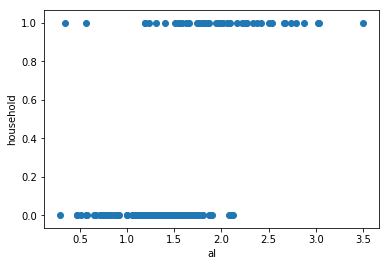

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')
plt.show()

Why do it this way?  It'll become clear in a minute, but having the values be 0.0 and 1.0 helps with prpbabilities when we get to the logistic function. 

Now a linear regression (same as before)

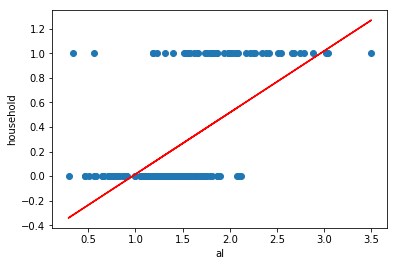

In [12]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')
plt.show()

What do you notice about this plot? Where is the cutoff?


If we want to predict the class, we want to predict where the regression line is greater than 0.5, when we predict `household == True`.  If we add a new column to predict that, and draw our class prediction, we get:

In [13]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

ri     na    mg    al     si     k    ca   ba   fe  glass_type  \
id                                                                        
1   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0           1   
2   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0           1   
3   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0           1   
4   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0           1   
5   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0           1   

    household  household_pred  household_pred_class  
id                                                   
1           0        0.065459                     0  
2           0        0.195765                     0  
3           0        0.285976                     0  
4           0        0.160682                     0  
5           0        0.135623                     0

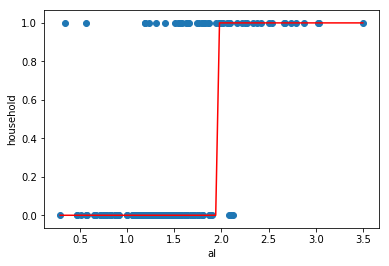

In [16]:
# plot the class predictions
glass.sort_values(by=['al'], inplace=True) # necessary for plotting the line...
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')
plt.show()

## Using Logistic Regression instead

Logistic regression can do the same thing:

In [17]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

/home/john/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


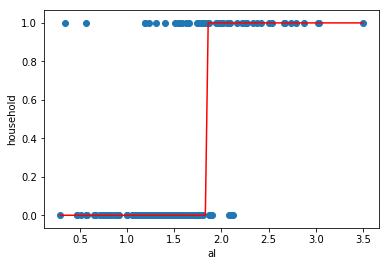

In [18]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')
plt.show()

But has the added benefit that is can predict probabilities of a class, instead of just the class itself.

In [19]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [20]:
glass.head()

ri     na    mg    al     si     k     ca   ba    fe  glass_type  \
id                                                                           
22   1.51966  14.77  3.75  0.29  72.02  0.03   9.00  0.0  0.00           1   
185  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.0  0.00           6   
40   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.0  0.00           1   
39   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.0  0.00           1   
51   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.0  0.16           1   

     household  household_pred  household_pred_class  household_pred_prob  
id                                                                         
22           0       -0.340495                     0             0.001499  
185          1       -0.315436                     0             0.001847  
40           0       -0.250283                     0             0.003176  
39           0       -0.250283                     0             0.003176  
51           0       -0.230236                     0             0.003752

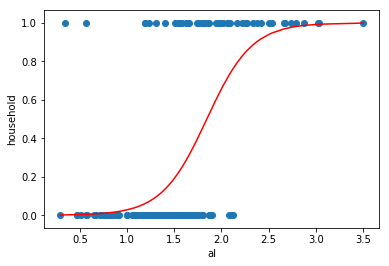

In [22]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')
plt.show()

In [27]:
# examine some example predictions
print(logreg.predict_proba(np.array([1]).reshape(1, -1)))
print(logreg.predict_proba(np.array([2]).reshape(1, -1)))
print(logreg.predict_proba(np.array([3]).reshape(1, -1)))


[[0.97161726 0.02838274]]
[[0.34361555 0.65638445]]
[[0.00794192 0.99205808]]


The first column is the probability of it not being household glass, the second is the probability of houseld being True. 

So:

    Logistic regression outputs the probabilities of a specific class
    Those probabilities can be converted into class predictions

The logistic function has some nice properties:

    Takes on an "s" shape
    Output is bounded by 0 and 1

We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?

    Most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): decompose the problem into multiple binary classification problems
    Multinomial logistic regression can solve this as a single problem

